In [4]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision.datasets 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import pytorch_lightning as pl
import wandb
from data import ImageSdf

np.random.seed(123)
torch.manual_seed(123)
def load_images(N=2):
    """
    Returns (N, 28, 28)?? of Bool? 
    """
    dataset = torchvision.datasets.MNIST('.', False, download=True)
    
    image_list = []
    for i in range(N):
        image, label = dataset[np.random.randint(0, len(dataset))]
        image = np.array(image)
        print(image.shape)
        image_list.append(image)
    return image_list
image_list = load_images()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(28, 28)
(28, 28)



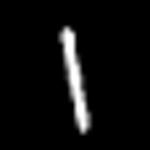
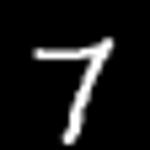


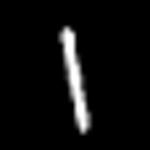
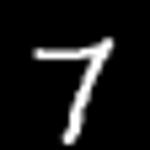

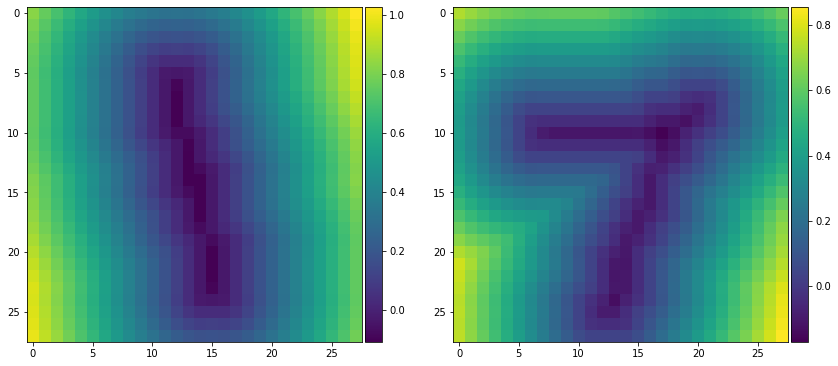

In [2]:
z_dim = 2
dataset = ImageSdf(image_list, z_dim)

2D sdf loader

In [24]:
%matplotlib inline
import wandb
from torch.utils.data import DataLoader
from pytorch_lightning.loggers import WandbLogger


train_loader = DataLoader(dataset, batch_size=None)
val_loader = DataLoader(dataset, batch_size=None)



In [23]:
wandb.finish()
# wandb.init(project='lipschitz', name='wn:none')
wandb_logger = WandbLogger(project='lipschitz', log_model=True, name='wn:none', save_dir='log/',)

wn_model = SdfDec(0, z_dim, [64, 64, 64,], 2, weight_norm='none')
# training
trainer = pl.Trainer(gpus=1, 
    logger=wandb_logger, 
    max_steps=5000,
    check_val_every_n_epoch=100,
    )
trainer.fit(wn_model, train_loader, val_loader)



NameError: name 'wandb' is not defined

In [26]:
from vis_utils import show_images
def interpolate(z1, z2, model, title='interpolate', N=10):
    device = z1.device
    alpha = torch.linspace(0, 1, N, device=device).unsqueeze(-1)
    z = z1 * alpha + z2 * (1 - alpha)  # (N, D?)

    image_list = []
    for n in range(N):
        image = model.vis_z(z[n:n+1])
        image_list.append(image)
    
    image_list = torch.cat(image_list, 0)
    image = image_list.cpu().detach().numpy()[:, 0]
    print(image.shape)
    fig = show_images(image, True)
    fig.set_dpi(100)

    # wandb.log({'chart': plt})
    print(model.global_step)
    wandb.log({'interpolate': wandb.Image(fig, caption=title)}, step=model.global_step)
    plt.savefig('docs/%s.png' % title)
    return plt


In [ ]:
device = 'cuda:0'
wn_model = wn_model.to(device)
z1 = torch.FloatTensor([[0, ]]).to(device).repeat(1, z_dim)
z2 = torch.FloatTensor([[1, ]]).to(device).repeat(1, z_dim)
interpolate(z1, z2, wn_model, 'wo regulrizer')

Output wo regularizer: 
Interpolation results, z_dim=2 | model 
--- |  --- 
![](docs/wo_reg.png) | [model](log/wn\:none/version_None/checkpoints/epoch\=2499-step\=4999.ckpt)


In [ ]:
wandb.finish()
alpha = 1
wandb_logger = WandbLogger(project='lipschitz', log_model=True, name='wn:lip_%g' % alpha)
lip_model = SdfDec(alpha, z_dim, [64, 64, 64,], 2, weight_norm='lip', norm_layers=(0, 1, 2, 3))
# training
trainer = pl.Trainer(gpus='0', 
    logger=wandb_logger, 
    max_steps=5000,
    check_val_every_n_epoch=100,
    )
trainer.fit(lip_model, train_loader, val_loader)

In [ ]:
lip_model = lip_model.to(device)
interpolate(z1, z2, lip_model)

Output $\alpha = 1$: 
Interpolation results, z_dim=2 | model 
--- |  --- 
![](docs/lip.png) | [model](log/wn\:lip_1/version_None/checkpoints/epoch\=2499-step\=4999-v1.ckpt)


print someth



a,▁
train_lip,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_sdf,█▅▃▃▂▂▁▂▂▁▂▂▂▃▂▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▂▂▁▂
val_lip,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sdf,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
a,1
train_lip,0.00012
train_loss,0.00107
train_sdf,0.00095


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name | Type    | Params
---------------------------------
0 | dec  | Decoder | 8.7 K 
---------------------------------
8.7 K     Trainable params
0         Non-trainable params
8.7 K     Total params
0.035     Total estimated model params size (MB)
/private/home/yufeiy2/.conda/envs/lasr/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory log/alpha=1/version_None/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

(10, 28, 28)


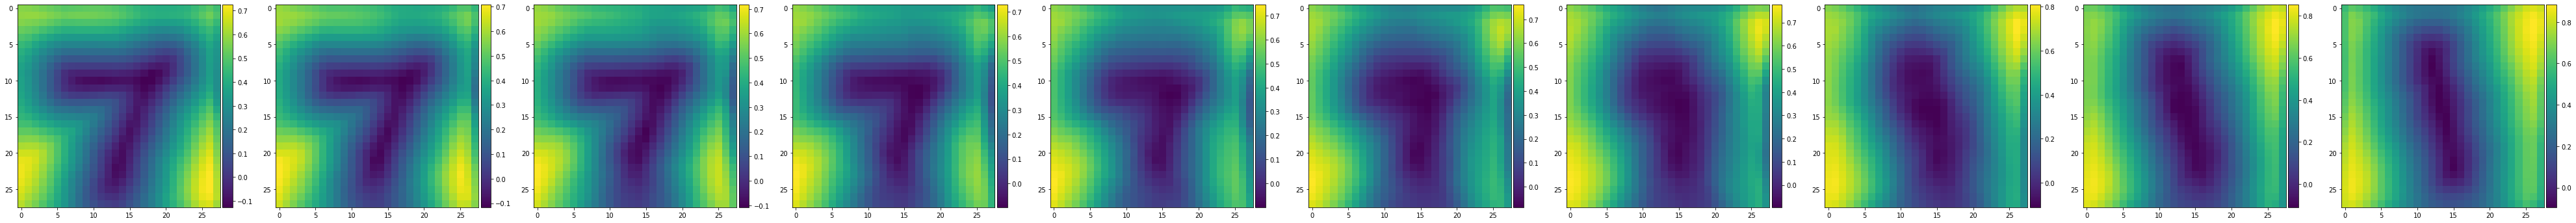

5000
print someth



a,▁
train_lip,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_sdf,█▄▂▂▁▁▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_lip,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sdf,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
a,1
train_lip,0.00012
train_loss,0.00126
train_sdf,0.00114


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name | Type    | Params
---------------------------------
0 | dec  | Decoder | 8.7 K 
---------------------------------
8.7 K     Trainable params
0         Non-trainable params
8.7 K     Total params
0.035     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

(10, 28, 28)


<Figure size 432x288 with 0 Axes>

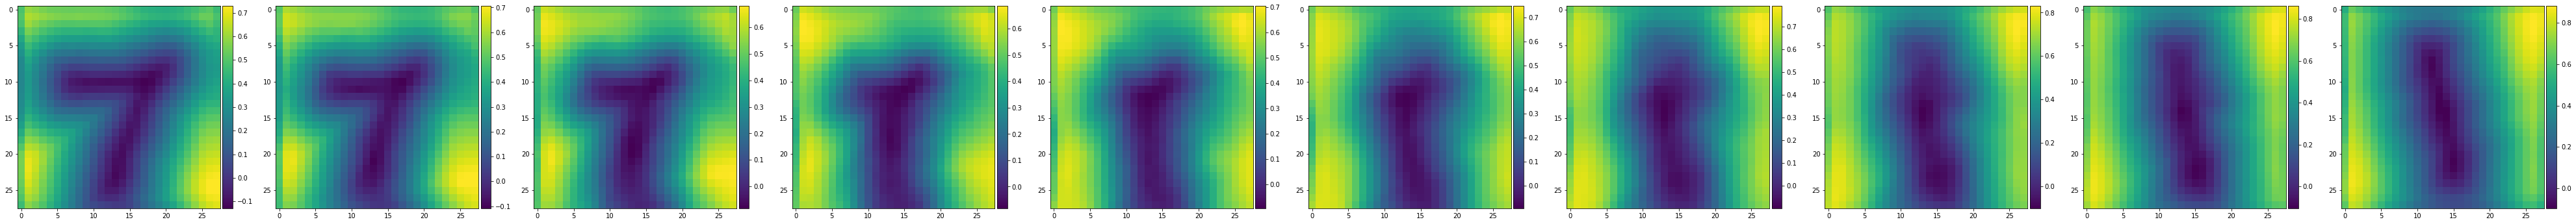

5000
print someth



a,▁
train_lip,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_sdf,█▅▃▃▂▂▂▂▂▂▂▃▂▂▂▁▂▂▂▃▂▂▂▁▁▂▂▁▂▁▁▁▂▂▁▂▁▁▁▂
val_lip,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sdf,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
a,0.1
train_lip,1e-05
train_loss,0.00118
train_sdf,0.00117


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name | Type    | Params
---------------------------------
0 | dec  | Decoder | 8.7 K 
---------------------------------
8.7 K     Trainable params
0         Non-trainable params
8.7 K     Total params
0.035     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

(10, 28, 28)


<Figure size 432x288 with 0 Axes>

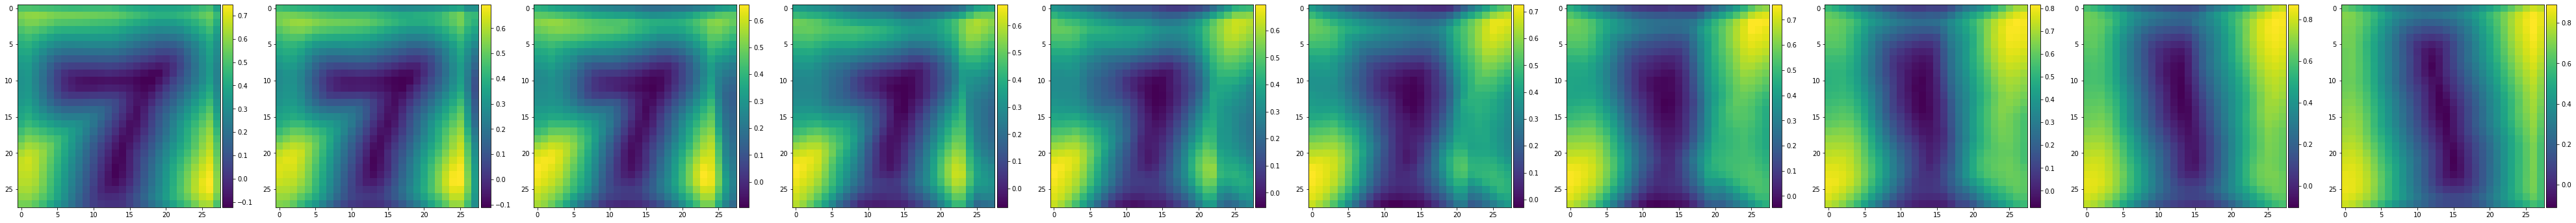

5000
print someth



a,▁
train_lip,█▇▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▄▃▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_sdf,█▃▃▁▂▂▂▂▂▁▁▂▂▃▂▂▁▂▁▂▂▁▁▁▁▂▂▂▁▂▂▁▁▁▂▂▁▁▁▁
val_lip,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sdf,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
a,0.01
train_lip,0.0
train_loss,0.0009
train_sdf,0.0009


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name | Type    | Params
---------------------------------
0 | dec  | Decoder | 8.7 K 
---------------------------------
8.7 K     Trainable params
0         Non-trainable params
8.7 K     Total params
0.035     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

(10, 28, 28)


<Figure size 432x288 with 0 Axes>

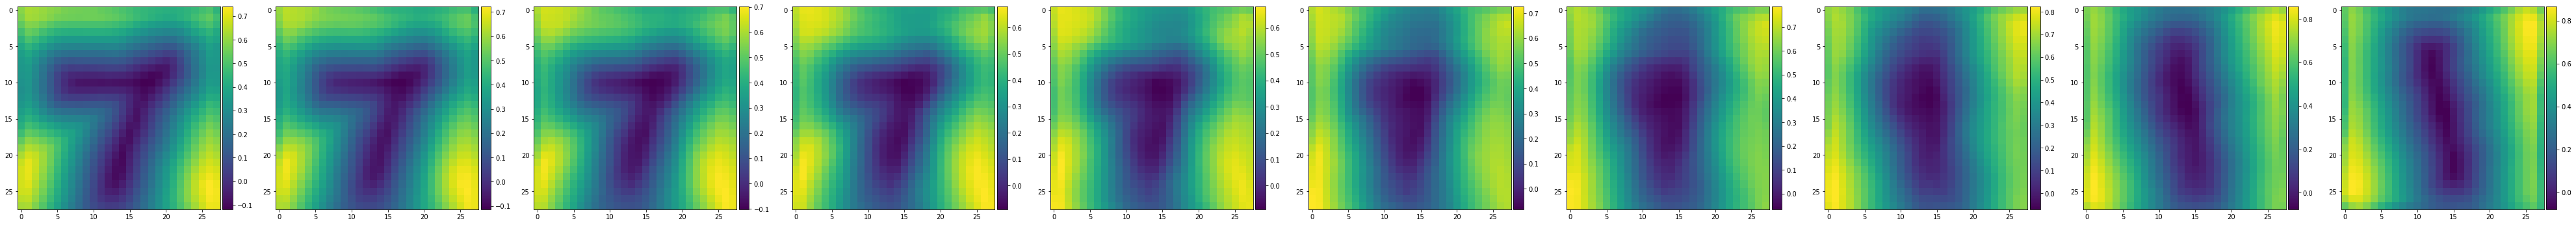

5000
print someth



wandb: ERROR Control-C detected -- Run data was not synced
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name | Type    | Params
---------------------------------
0 | dec  | Decoder | 8.7 K 
---------------------------------
8.7 K     Trainable params
0         Non-trainable params
8.7 K     Total params
0.035     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [27]:
def my_train_func(alpha):
    # read the current value of parameter "a" from wandb.config
    print('print someth')
    log_name = 'alpha=%g' % alpha
    # run.name = log_name
    wandb.finish()
    wandb_logger = WandbLogger(name=log_name, save_dir='log/', )

    lip_model = SdfDec(alpha, z_dim, [64, 64, 64,], 2, weight_norm='lip', norm_layers=(0, 1, 2, 3))
    # training
    trainer = pl.Trainer(gpus=1, 
        logger=wandb_logger, 
        max_steps=5000,
        check_val_every_n_epoch=100,
        )
    trainer.fit(lip_model, train_loader, val_loader)
    wandb.log({"a": alpha})
    
    device = 'cuda:0'
    lip_model = lip_model.to(device)
    z1 = torch.FloatTensor([[0, ]]).to(device).repeat(1, z_dim)
    z2 = torch.FloatTensor([[1, ]]).to(device).repeat(1, z_dim)
    interpolate(z1, z2, lip_model, 'alpha=%g' % alpha)


for alpha in [1, 1e-1, 1e-2, 1e-3, 1e-4, 0]:
    my_train_func(alpha)



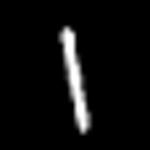
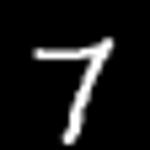


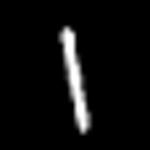
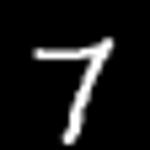

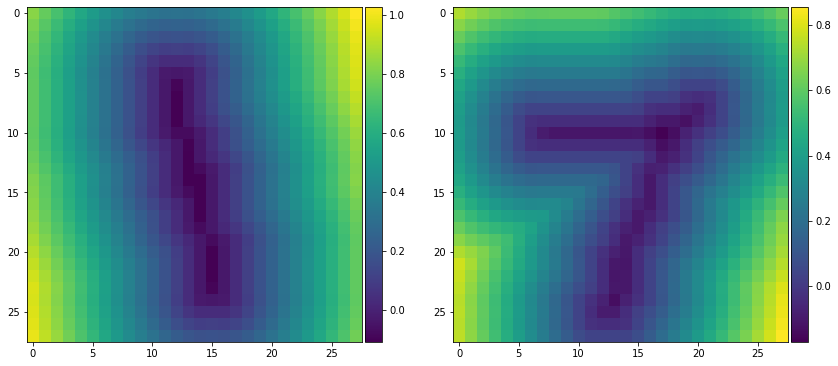

/private/home/yufeiy2/.conda/envs/lasr/lib/python3.8/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


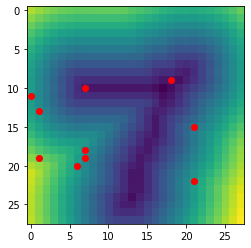

In [6]:
## opt wrt the following

from vis_utils import show_images
z_dim = 2
dataset = ImageSdf(image_list, z_dim, 10)
torch.manual_seed(1234)
x, z, y = dataset[1]
plt.imshow(dataset.edt[1])
H, W = dataset.H, dataset.W
plt.scatter(x[..., 0].detach().numpy() * W//2 + W//2, x[..., 1].detach().numpy() * H//2 + H//2, c='red')

z_start = torch.zeros([1, z_dim]) + 0.5

In [7]:
from decoder import SdfDec

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def optimize(x, y, z, model: SdfDec, T=1000, title=''):
    """
    x: (P, 2)
    y: (P, 1)
    z: (z_dim)
    model: 
    """
    zz = nn.Parameter(z.view(1, z_dim).clone())
    opt = optim.Adam([zz], 1e-2)

    freq = T // 4
    zz_list = []
    fig, axs = plt.subplots(1, 4, figsize=(7 * 4,7))
    for t in range(T):
        opt.zero_grad()
        z_exp = zz.repeat(x.size(0), 1)
        y_hat = model(x, z_exp)

        loss = 10 * F.mse_loss(y_hat, y)
        wandb.log({'loss': loss}, step=t)
        print(t, loss)
        loss.backward()
        opt.step()

        zz_list.append(zz.cpu().detach().numpy())
        if t % freq == 0:
            image = model.vis_z(zz)
            axs[t//freq].imshow(image[0, 0].cpu().detach().numpy())
            axs[t//freq].title.set_text('t=%d' % t)
    fig.suptitle(title)
    plt.show()
    zz_list = np.array(zz_list).reshape(T, z_dim)
    plt.plot(zz_list[..., 0], zz_list[..., -1])
    plt.title('z_last = %.2f %.2f' % (zz_list[-1, 0].item(), zz_list[-1, 1].item()))
    plt.show()
    return zz_list

        


In [8]:
import os
def vis_opt(folder, lip_model):
    wandb.finish()  

    # z_dim = 2
    # lip_model = SdfDec(1, z_dim, [64, 64, 64,], 2, weight_norm='lip', norm_layers=(0, 1, 2, 3))
    log_dir = 'log/%s/version_None/opt' % folder
    os.makedirs(log_dir, exist_ok=True)
    wandb.init(dir=log_dir, project='opt_lip', name='opt folder')
    ckpt = torch.load('log/%s/version_None/checkpoints/epoch=2499-step=4999.ckpt' % folder)
    lip_model.load_state_dict(ckpt['state_dict'])

    device = 'cuda:0'
    lip_model.to(device)
    optimize(x.to(device), y.to(device), z_start.to(device), lip_model, title=folder)    

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: condinv-ssl (use `wandb login --relogin` to force relogin)


0 tensor(0.3185, device='cuda:0', grad_fn=<MulBackward0>)
did not log  sample
1 tensor(0.3092, device='cuda:0', grad_fn=<MulBackward0>)
2 tensor(0.3001, device='cuda:0', grad_fn=<MulBackward0>)
3 tensor(0.2910, device='cuda:0', grad_fn=<MulBackward0>)
4 tensor(0.2814, device='cuda:0', grad_fn=<MulBackward0>)
5 tensor(0.2723, device='cuda:0', grad_fn=<MulBackward0>)
6 tensor(0.2637, device='cuda:0', grad_fn=<MulBackward0>)
7 tensor(0.2550, device='cuda:0', grad_fn=<MulBackward0>)
8 tensor(0.2452, device='cuda:0', grad_fn=<MulBackward0>)
9 tensor(0.2338, device='cuda:0', grad_fn=<MulBackward0>)
10 tensor(0.2231, device='cuda:0', grad_fn=<MulBackward0>)
11 tensor(0.2130, device='cuda:0', grad_fn=<MulBackward0>)
12 tensor(0.2031, device='cuda:0', grad_fn=<MulBackward0>)
13 tensor(0.1930, device='cuda:0', grad_fn=<MulBackward0>)
14 tensor(0.1833, device='cuda:0', grad_fn=<MulBackward0>)
15 tensor(0.1736, device='cuda:0', grad_fn=<MulBackward0>)
16 tensor(0.1636, device='cuda:0', grad_fn=<Mu

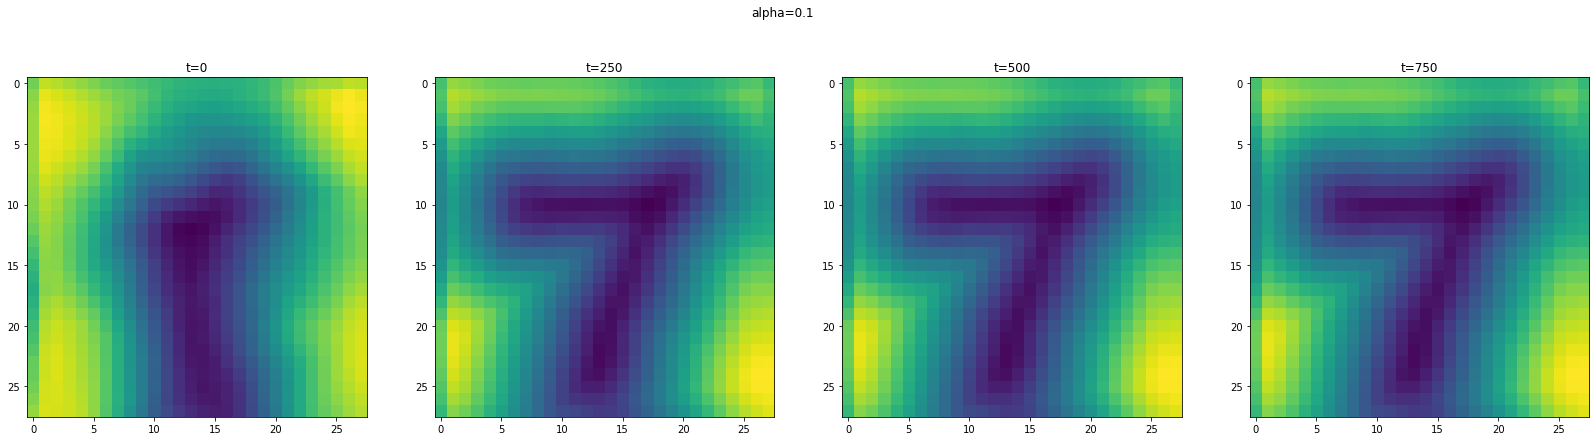

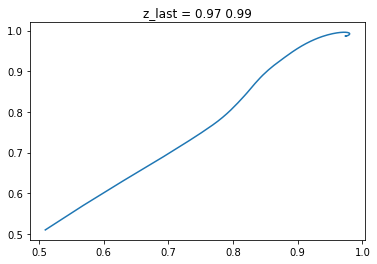

In [9]:

lip_model = SdfDec(1, z_dim, [64, 64, 64,], 2, weight_norm='lip', norm_layers=(0, 1, 2, 3))

vis_opt('alpha=%g' % 0.1, lip_model)

loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.00065


0 tensor(0.0601, device='cuda:0', grad_fn=<MulBackward0>)
did not log  sample
1 tensor(0.0579, device='cuda:0', grad_fn=<MulBackward0>)
2 tensor(0.0558, device='cuda:0', grad_fn=<MulBackward0>)
3 tensor(0.0542, device='cuda:0', grad_fn=<MulBackward0>)
4 tensor(0.0526, device='cuda:0', grad_fn=<MulBackward0>)
5 tensor(0.0511, device='cuda:0', grad_fn=<MulBackward0>)
6 tensor(0.0497, device='cuda:0', grad_fn=<MulBackward0>)
7 tensor(0.0484, device='cuda:0', grad_fn=<MulBackward0>)
8 tensor(0.0473, device='cuda:0', grad_fn=<MulBackward0>)
9 tensor(0.0462, device='cuda:0', grad_fn=<MulBackward0>)
10 tensor(0.0449, device='cuda:0', grad_fn=<MulBackward0>)
11 tensor(0.0436, device='cuda:0', grad_fn=<MulBackward0>)
12 tensor(0.0423, device='cuda:0', grad_fn=<MulBackward0>)
13 tensor(0.0410, device='cuda:0', grad_fn=<MulBackward0>)
14 tensor(0.0396, device='cuda:0', grad_fn=<MulBackward0>)
15 tensor(0.0382, device='cuda:0', grad_fn=<MulBackward0>)
16 tensor(0.0369, device='cuda:0', grad_fn=<Mu

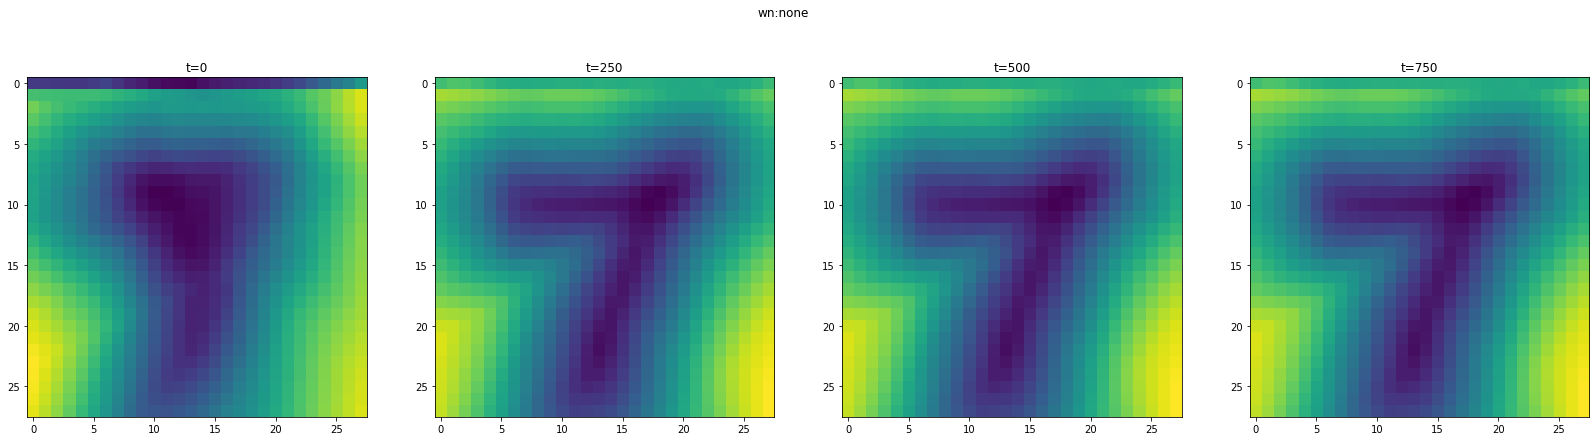

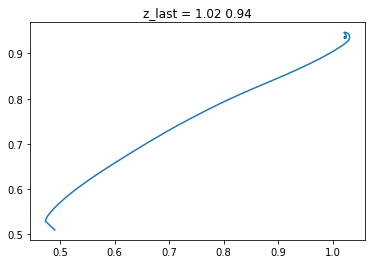

In [10]:

wn_model = SdfDec(1, z_dim, [64, 64, 64,], 2, )
vis_opt('wn:none', wn_model, )

### when z = 0

In [11]:
z_start = torch.zeros([1, z_dim])

loss,█▄▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.00453


0 tensor(0.5388, device='cuda:0', grad_fn=<MulBackward0>)
did not log  sample
1 tensor(0.5212, device='cuda:0', grad_fn=<MulBackward0>)
2 tensor(0.5040, device='cuda:0', grad_fn=<MulBackward0>)
3 tensor(0.4872, device='cuda:0', grad_fn=<MulBackward0>)
4 tensor(0.4709, device='cuda:0', grad_fn=<MulBackward0>)
5 tensor(0.4554, device='cuda:0', grad_fn=<MulBackward0>)
6 tensor(0.4401, device='cuda:0', grad_fn=<MulBackward0>)
7 tensor(0.4247, device='cuda:0', grad_fn=<MulBackward0>)
8 tensor(0.4102, device='cuda:0', grad_fn=<MulBackward0>)
9 tensor(0.3960, device='cuda:0', grad_fn=<MulBackward0>)
10 tensor(0.3824, device='cuda:0', grad_fn=<MulBackward0>)
11 tensor(0.3704, device='cuda:0', grad_fn=<MulBackward0>)
12 tensor(0.3583, device='cuda:0', grad_fn=<MulBackward0>)
13 tensor(0.3461, device='cuda:0', grad_fn=<MulBackward0>)
14 tensor(0.3342, device='cuda:0', grad_fn=<MulBackward0>)
15 tensor(0.3221, device='cuda:0', grad_fn=<MulBackward0>)
16 tensor(0.3100, device='cuda:0', grad_fn=<Mu

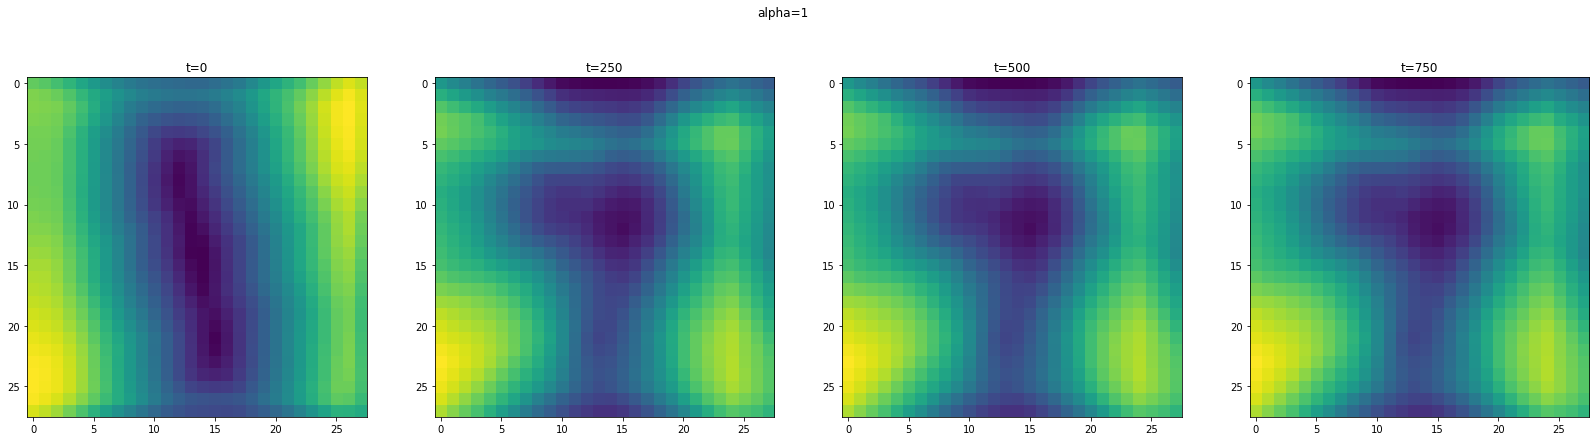

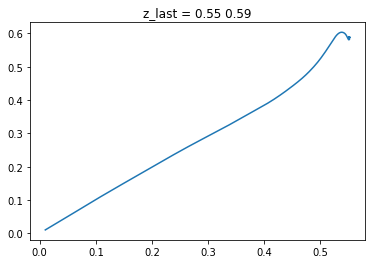

In [14]:

lip_model = SdfDec(1, z_dim, [64, 64, 64,], 2, weight_norm='lip', norm_layers=(0, 1, 2, 3))

vis_opt('alpha=%g' % 1, lip_model)

loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.48288


0 tensor(0.5245, device='cuda:0', grad_fn=<MulBackward0>)
did not log  sample
1 tensor(0.5116, device='cuda:0', grad_fn=<MulBackward0>)
2 tensor(0.4982, device='cuda:0', grad_fn=<MulBackward0>)
3 tensor(0.4846, device='cuda:0', grad_fn=<MulBackward0>)
4 tensor(0.4705, device='cuda:0', grad_fn=<MulBackward0>)
5 tensor(0.4561, device='cuda:0', grad_fn=<MulBackward0>)
6 tensor(0.4417, device='cuda:0', grad_fn=<MulBackward0>)
7 tensor(0.4275, device='cuda:0', grad_fn=<MulBackward0>)
8 tensor(0.4132, device='cuda:0', grad_fn=<MulBackward0>)
9 tensor(0.3992, device='cuda:0', grad_fn=<MulBackward0>)
10 tensor(0.3855, device='cuda:0', grad_fn=<MulBackward0>)
11 tensor(0.3719, device='cuda:0', grad_fn=<MulBackward0>)
12 tensor(0.3583, device='cuda:0', grad_fn=<MulBackward0>)
13 tensor(0.3451, device='cuda:0', grad_fn=<MulBackward0>)
14 tensor(0.3334, device='cuda:0', grad_fn=<MulBackward0>)
15 tensor(0.3227, device='cuda:0', grad_fn=<MulBackward0>)
16 tensor(0.3115, device='cuda:0', grad_fn=<Mu

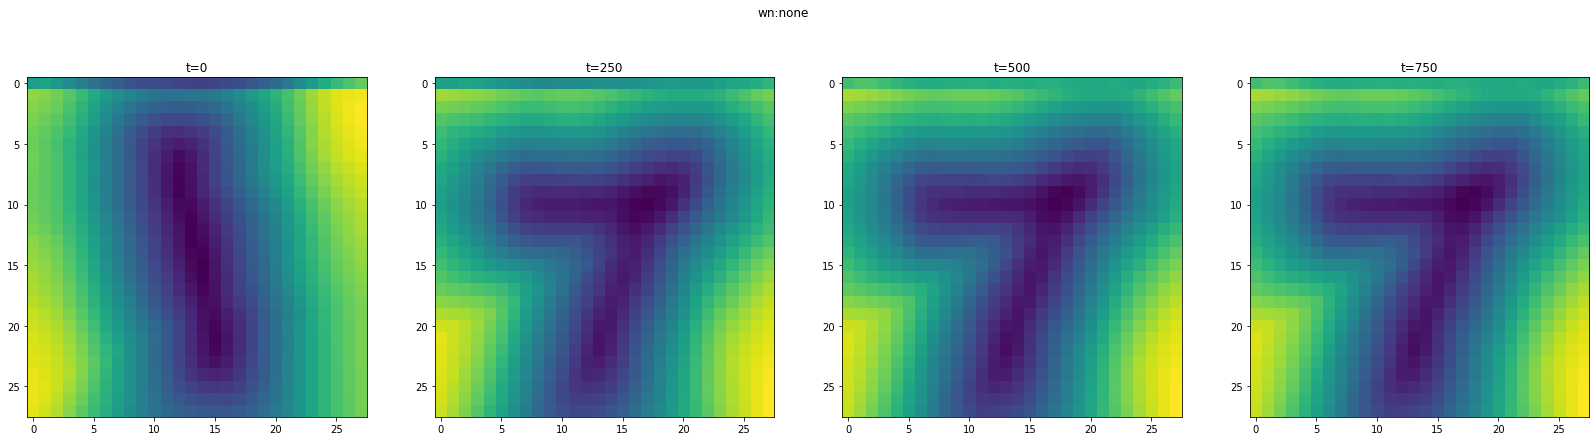

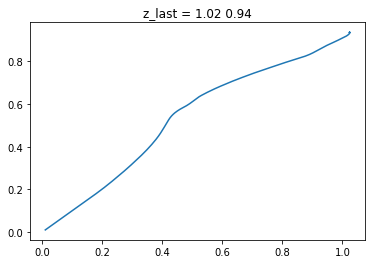

In [13]:

wn_model = SdfDec(1, z_dim, [64, 64, 64,], 2, )
vis_opt('wn:none', wn_model, )

In [17]:
z_start = torch.zeros([1, z_dim]); z_start[:, 0] = 1

loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.0626


0 tensor(0.4390, device='cuda:0', grad_fn=<MulBackward0>)
did not log  sample
1 tensor(0.4284, device='cuda:0', grad_fn=<MulBackward0>)
2 tensor(0.4176, device='cuda:0', grad_fn=<MulBackward0>)
3 tensor(0.4069, device='cuda:0', grad_fn=<MulBackward0>)
4 tensor(0.3969, device='cuda:0', grad_fn=<MulBackward0>)
5 tensor(0.3874, device='cuda:0', grad_fn=<MulBackward0>)
6 tensor(0.3779, device='cuda:0', grad_fn=<MulBackward0>)
7 tensor(0.3685, device='cuda:0', grad_fn=<MulBackward0>)
8 tensor(0.3586, device='cuda:0', grad_fn=<MulBackward0>)
9 tensor(0.3476, device='cuda:0', grad_fn=<MulBackward0>)
10 tensor(0.3365, device='cuda:0', grad_fn=<MulBackward0>)
11 tensor(0.3253, device='cuda:0', grad_fn=<MulBackward0>)
12 tensor(0.3134, device='cuda:0', grad_fn=<MulBackward0>)
13 tensor(0.3016, device='cuda:0', grad_fn=<MulBackward0>)
14 tensor(0.2899, device='cuda:0', grad_fn=<MulBackward0>)
15 tensor(0.2801, device='cuda:0', grad_fn=<MulBackward0>)
16 tensor(0.2711, device='cuda:0', grad_fn=<Mu

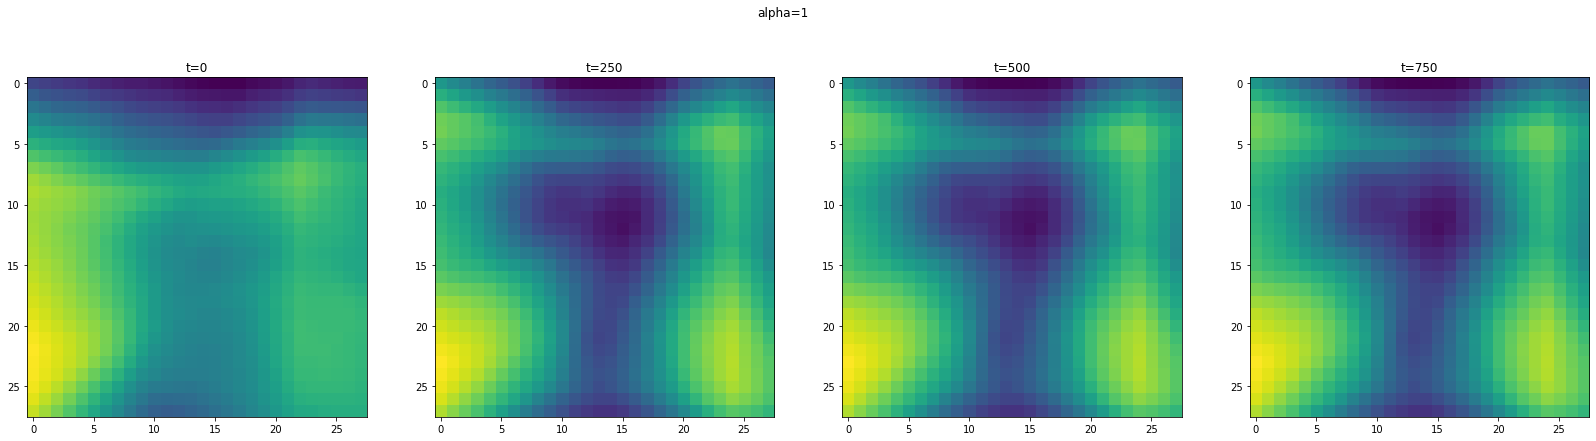

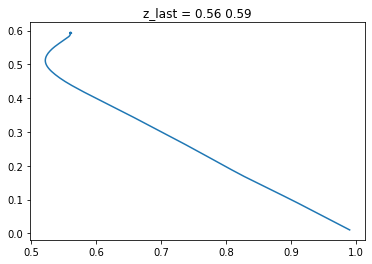

In [18]:

lip_model = SdfDec(1, z_dim, [64, 64, 64,], 2, weight_norm='lip', norm_layers=(0, 1, 2, 3))

vis_opt('alpha=%g' % 1, lip_model)   

loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.06273


0 tensor(0.2386, device='cuda:0', grad_fn=<MulBackward0>)
did not log  sample
1 tensor(0.2363, device='cuda:0', grad_fn=<MulBackward0>)
2 tensor(0.2340, device='cuda:0', grad_fn=<MulBackward0>)
3 tensor(0.2317, device='cuda:0', grad_fn=<MulBackward0>)
4 tensor(0.2296, device='cuda:0', grad_fn=<MulBackward0>)
5 tensor(0.2276, device='cuda:0', grad_fn=<MulBackward0>)
6 tensor(0.2252, device='cuda:0', grad_fn=<MulBackward0>)
7 tensor(0.2228, device='cuda:0', grad_fn=<MulBackward0>)
8 tensor(0.2206, device='cuda:0', grad_fn=<MulBackward0>)
9 tensor(0.2188, device='cuda:0', grad_fn=<MulBackward0>)
10 tensor(0.2170, device='cuda:0', grad_fn=<MulBackward0>)
11 tensor(0.2151, device='cuda:0', grad_fn=<MulBackward0>)
12 tensor(0.2127, device='cuda:0', grad_fn=<MulBackward0>)
13 tensor(0.2096, device='cuda:0', grad_fn=<MulBackward0>)
14 tensor(0.2052, device='cuda:0', grad_fn=<MulBackward0>)
15 tensor(0.2003, device='cuda:0', grad_fn=<MulBackward0>)
16 tensor(0.1953, device='cuda:0', grad_fn=<Mu

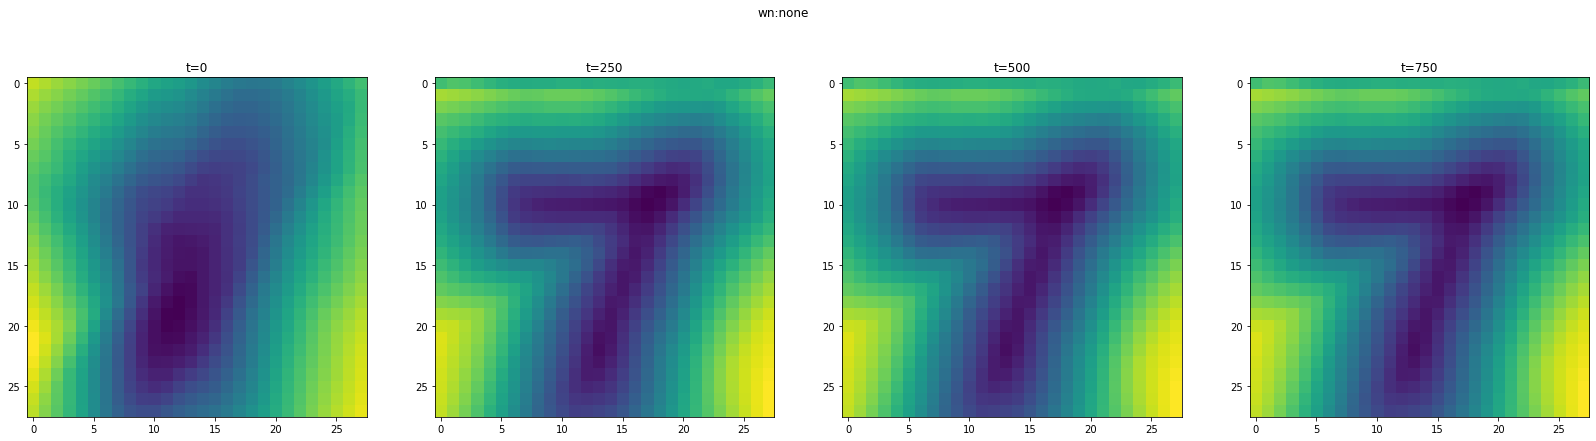

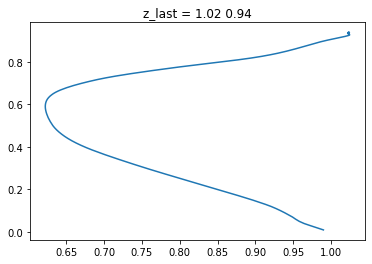

In [19]:

wn_model = SdfDec(1, z_dim, [64, 64, 64,], 2, )
vis_opt('wn:none', wn_model, )